# Data analysis on thermal phase 2+1D CDT

Author: Seda den Boer

Date: 04/04/2024

In [1]:
# Load packages
import sys
sys.path.append('..')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob

## Experiment parameters

In [581]:
chains = 16
k0_values = np.arange(0.0, 8.0, 1.0)
T = 3
thermal_sweeps = 1000
sweeps = 0
target_volume = 6000
ksteps = target_volume * 100

# k0 to make plots for
k0 = 7.0

## $k_3$

### Critical $k_3$

In [582]:
last_k3 = {k: [] for k in k0_values}

for k in k0_values:
    path = f'thermal_{target_volume}/T{T}/measurements/k0={k}'
    filepaths = glob.glob(f'{path}/*k3_values.npy')
    for file in filepaths:
        
        # print(file)
        k3_values = np.load(file)

        # Get final value in the dataset
        last_k3[k].append(k3_values[-1])


# Make it a df 
df_critical_k3 = pd.DataFrame(last_k3).T
df_critical_k3.index.name = 'k0'
df_critical_k3.columns.name = 'chain'
df_critical_k3['mean'] = df_critical_k3.mean(axis=1)
df_critical_k3['std'] = df_critical_k3.std(axis=1)
df_critical_k3

chain,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,mean,std
k0,,,,,,,,,,,,,,,,,,
0.0,0.95210,0.95556,0.95456,0.95568,0.95764,0.96288,0.95532,0.95480,0.95146,0.95392,0.95442,0.95064,0.95232,0.95618,0.95624,0.95490,0.954914,0.002757
1.0,1.08768,1.08264,1.08872,1.08378,1.08518,1.08240,1.08340,1.08526,1.08840,1.08488,1.08746,1.08406,1.08360,1.08634,1.08674,1.08146,1.085125,0.002166
2.0,1.22260,1.22378,1.21896,1.22034,1.22342,1.21938,1.22092,1.22340,1.22514,1.22100,1.22498,1.21958,1.22250,1.22296,1.22126,1.22076,1.221936,0.001876
3.0,1.37034,1.37014,1.36896,1.37154,1.36908,1.37202,1.36888,1.37028,1.36822,1.36968,1.37072,1.37118,1.37038,1.36880,1.37092,1.36860,1.369984,0.001102
4.0,1.52894,1.52924,1.52808,1.52856,1.53042,1.52956,1.53086,1.52930,1.52886,1.53014,1.52974,1.52688,1.52964,1.53110,1.52964,1.52828,1.529327,0.001042
5.0,1.70222,1.70184,1.70380,1.70468,1.70172,1.70420,1.70156,1.70424,1.70102,1.70252,1.70330,1.70200,1.70412,1.70300,1.70534,1.70384,1.703087,0.001241
6.0,1.89440,1.88936,1.89228,1.89110,1.89034,1.89672,1.88932,1.88904,1.89170,1.89010,1.88980,1.89802,1.89280,1.89754,1.89350,1.88932,1.892209,0.002952
7.0,2.13824,2.14004,2.13900,2.13902,2.13918,2.13926,2.13962,2.13820,2.13890,2.13972,2.13776,2.13902,2.13928,2.14000,2.13882,2.13972,2.139111,0.000627


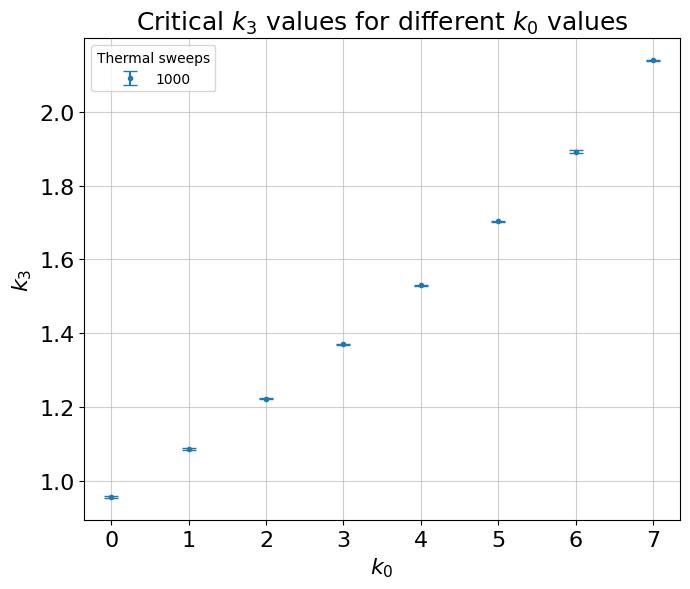

In [583]:
# Plot critical k3 with markers and interpolated line
plt.figure(figsize=(7, 6))
plt.errorbar(df_critical_k3.index, df_critical_k3['mean'], yerr=df_critical_k3['std'], fmt='.', capsize=5, xerr=None, label=1000)
plt.title('Critical $k_3$ values for different $k_0$ values', fontsize=18)
plt.xlabel('$k_0$', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Thermal sweeps', fancybox=True)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_critical_k3_values_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

### $k_3$ over time

In [584]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_k3 = glob.glob(f'{path}/*k3_values.npy')
k3_values = []
for filepath in filepaths_k3:
    k3_values.append(np.load(filepath))

# Make it a df to plot easily the mean and std
df_k3 = pd.DataFrame(k3_values)
# make a column for chain, sweep and the values k3
df_k3 = df_k3.melt(var_name='sweep', value_name='k3', ignore_index=False).reset_index()
# Increase sweep number by 1
df_k3['sweep'] += 1
df_k3

,index,sweep,k3
0,0,1,2.20000
1,1,1,2.20000
2,2,1,2.20000
3,3,1,2.20000
4,4,1,2.20000
...,...,...,...
15995,11,1000,2.13902
15996,12,1000,2.13928
15997,13,1000,2.14000
15998,14,1000,2.13882


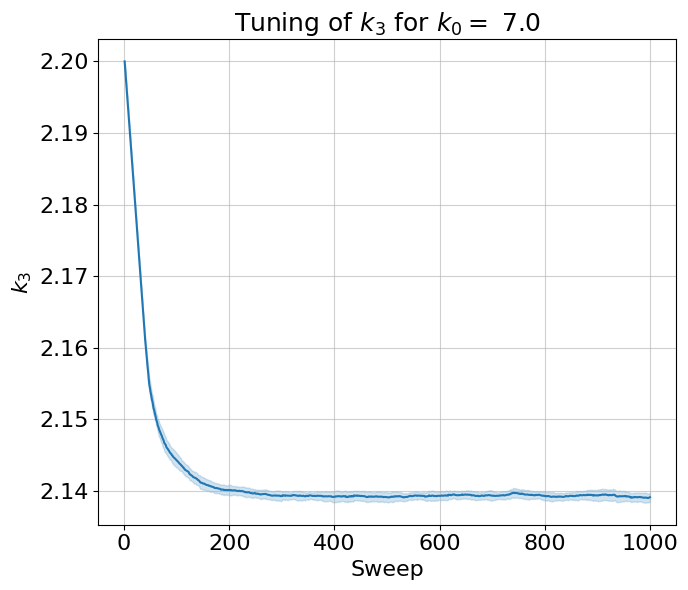

In [585]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_k3, x='sweep', y='k3', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$k_3$', fontsize=16)
plt.title(f'Tuning of $k_3$ for $k_0=$ {k0}', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/k3_tuning/T{T}/N{target_volume}/T{T}_k3_tuning_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/k3_tuning/T{T}/N{target_volume}'):
    os.makedirs(f'plots/k3_tuning/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Acceptance ratios

In [586]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_ar = glob.glob(f'{path}/*acceptance_ratios.npy')
ar_add = []
ar_delete = []
ar_flip = []
ar_shift = []
ar_ishift = []

for filepath in filepaths_ar:
    ar = np.load(filepath)
    ar_add.append(ar[:, 0])
    ar_delete.append(ar[:, 1])
    ar_flip.append(ar[:, 2])
    ar_shift.append(ar[:, 3])
    ar_ishift.append(ar[:, 4])

# Make it a df to plot easily the mean and std
df_ar_add = pd.DataFrame(ar_add)
df_ar_delete = pd.DataFrame(ar_delete)
df_ar_flip = pd.DataFrame(ar_flip)
df_ar_shift = pd.DataFrame(ar_shift)
df_ar_ishift = pd.DataFrame(ar_ishift)

# Make a column for chain, sweep and the values ar
df_ar_add = df_ar_add.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_delete = df_ar_delete.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_flip = df_ar_flip.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_shift = df_ar_shift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()
df_ar_ishift = df_ar_ishift.melt(var_name='sweep', value_name='ar', ignore_index=False).reset_index()

# Increase sweep number by 1
df_ar_add['sweep'] += 1
df_ar_delete['sweep'] += 1
df_ar_flip['sweep'] += 1
df_ar_shift['sweep'] += 1
df_ar_ishift['sweep'] += 1

In [587]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='lower right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

In [588]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_ar_add, x='sweep', y='ar', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_ar_delete, x='sweep', y='ar', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_ar_flip, x='sweep', y='ar', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_ar_shift, x='sweep', y='ar', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_ar_ishift, x='sweep', y='ar', errorbar='sd', label='Inverse Shift', color='purple')
plt.ylim(0, 1)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Acceptance ratio', fontsize=16)
plt.title(f'Acceptance ratios for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/acceptance_ratios/T{T}/N{target_volume}/zoomin_T{T}_acceptance_ratios_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/acceptance_ratios/T{T}/N{target_volume}'):
    os.makedirs(f'plots/acceptance_ratios/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## Succes rates

In [589]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_successes = glob.glob(f'{path}/*successes.npy')
filepath_fails = glob.glob(f'{path}/*fails.npy')

sr_add = []
sr_delete = []
sr_flip = []
sr_shift = []
sr_ishift = []

for i in range(chains):
    successes = np.load(filepaths_successes[i])
    fails = np.load(filepath_fails[i])
    sr_add.append(successes[:, 0] / (successes[:, 0] + fails[:, 0]))
    sr_delete.append(successes[:, 1] / (successes[:, 1] + fails[:, 1]))
    sr_flip.append(successes[:, 2] / (successes[:, 2] + fails[:, 2]))
    sr_shift.append(successes[:, 3] / (successes[:, 3] + fails[:, 3]))
    sr_ishift.append(successes[:, 4] / (successes[:, 4] + fails[:, 4]))

# Make it a df to plot easily the mean and std
df_sr_add = pd.DataFrame(sr_add)
df_sr_delete = pd.DataFrame(sr_delete)
df_sr_flip = pd.DataFrame(sr_flip)
df_sr_shift = pd.DataFrame(sr_shift)
df_sr_ishift = pd.DataFrame(sr_ishift)

# Make a column for chain, sweep and the values sr
df_sr_add = df_sr_add.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_delete = df_sr_delete.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_flip = df_sr_flip.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_shift = df_sr_shift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()
df_sr_ishift = df_sr_ishift.melt(var_name='sweep', value_name='sr', ignore_index=False).reset_index()

# Increase sweep number by 1
df_sr_add['sweep'] += 1
df_sr_delete['sweep'] += 1
df_sr_flip['sweep'] += 1
df_sr_shift['sweep'] += 1
df_sr_ishift['sweep'] += 1

In [590]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
sns.lineplot(data=df_sr_flip, x='sweep', y='sr', errorbar='sd', label='Flip', color='seagreen')
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for MCMC moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True, loc='upper right')
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


### Zoom-in

In [591]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_shift, x='sweep', y='sr', errorbar='sd', label='Shift', color='red')
sns.lineplot(data=df_sr_ishift, x='sweep', y='sr', errorbar='sd', label='Inverse Shift', color='purple')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for shift and ishift moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_shift_ishift_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


In [592]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_sr_add, x='sweep', y='sr', errorbar='sd', label='Add', color='royalblue')
sns.lineplot(data=df_sr_delete, x='sweep', y='sr', errorbar='sd', label='Delete', color='orangered')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Success rate', fontsize=16)
plt.title(f'Success rates for add and delete moves with $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='Move', fancybox=True)
plt.tight_layout()
savepath = f'plots/success_rates/T{T}/N{target_volume}/T{T}_add_delete_success_rates_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/success_rates/T{T}/N{target_volume}'):
    os.makedirs(f'plots/success_rates/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')


## $<N_{22}/N_{31}>$

### Over time

In [593]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_n22 = glob.glob(f'{path}/*n_tetras_22.npy')
filepaths_n31 = glob.glob(f'{path}/*n_tetras_31.npy')

n22_n31 = []

for i in range(chains):
    n22 = np.load(filepaths_n22[i])
    n31 = np.load(filepaths_n31[i])
    n22_n31.append(n22 / n31)

# Make it a df to plot easily the mean and std
df_n22_n31 = pd.DataFrame(n22_n31)
df_n22_n31 = df_n22_n31.melt(var_name='sweep', value_name='n22/n31', ignore_index=False).reset_index()
df_n22_n31['sweep'] += 1
df_n22_n31

In [594]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_n22_n31, x='sweep', y='n22/n31', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('$N_{22}/N_{31}$', fontsize=16)
plt.title(f'Ratio of $N_{{22}}/N_{{31}}$ for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/n22_n31/T{T}/N{target_volume}/T{T}_n22_n31_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/n22_n31/T{T}/N{target_volume}'):
    os.makedirs(f'plots/n22_n31/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Curvature

In [595]:
path = f'thermal_{target_volume}/T{T}/measurements/k0={k0}'
filepaths_curvature = glob.glob(f'{path}/*curvature.npy')

avg_curvature = {chain: [] for chain in range(chains)}
std_curvature = {chain: [] for chain in range(chains)}
curvature = {}

for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    final_added_values = []
    for data in curvature_data:
        added_values = []
        for key, value in data.items():
            # Add the values together in 1 list
            added_values += value

        # Calculate the average and std of the curvature
        avg_curvature[i].append(np.mean(added_values))
        std_curvature[i].append(np.std(added_values))
        

# Make it a df to plot easily the mean and std
df_avg_curvature = pd.DataFrame(avg_curvature).T
df_avg_curvature.index.name = 'chain'
df_avg_curvature.columns.name = 'sweep'
df_avg_curvature = df_avg_curvature.melt(var_name='sweep', value_name='avg_curvature', ignore_index=False).reset_index()
df_avg_curvature



In [596]:
# Plot the chains average with the standard deviation
plt.figure(figsize=(7, 6))
sns.lineplot(data=df_avg_curvature, x='sweep', y='avg_curvature', errorbar='sd')
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('Average full coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

In [597]:
# Add all data for at each sweep together from each chain
tmp1 = []
for i in range(chains):
    curvature_data = np.load(filepaths_curvature[i], allow_pickle=True)
    added = []
    # print(curvature_data)

    for d in curvature_data:
        tmp2 = []
        for value in d.values():
            tmp2 += value
        added.append(tmp2)
    tmp1.append(added)

curvature = [list(sum(zip(*sublists), ())) for sublists in zip(*tmp1)]

In [598]:
# Plot boxplots of the curvature for every 5 sweeps
sweeps_display = np.arange(0, 101, 5)
boxplot_data = [curvature[i] for i in sweeps_display]
plt.figure(figsize=(9, 6))
plt.boxplot(boxplot_data, showfliers=False)
# Manual plotting of maximum outliers
max_outliers = [np.max(data) for data in boxplot_data]
plt.scatter(np.arange(1, len(sweeps_display) + 1), max_outliers, marker='x', color='red', label='Max. outlier')
plt.xticks(range(1, len(sweeps_display) + 1), sweeps_display)
plt.xlabel('Sweep', fontsize=16)
plt.ylabel('full coordination number', fontsize=16)
plt.title(f'Curvature for $k_0={k0}$', fontsize=18)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend()
plt.tight_layout()
savepath = f'plots/curvature/T{T}/N{target_volume}/T{T}_curvature_boxplot_k0={k0}_N{target_volume}_tswps={thermal_sweeps}.png'
if not os.path.exists(f'plots/curvature/T{T}/N{target_volume}'):
    os.makedirs(f'plots/curvature/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

## Spectral dimension

In [179]:
T = 10
target_volume = 3000
k0 = 7.0
thermal_sweeps = 1000
main_sweeps = 0
diffusion_constant = 0.8
sigma_max = 2000
start_flag = 2
runs = 20
chain = 1
step = 8
chain_values_1 = np.arange(1, 73 + step, step)
chain_values_7 = np.arange(7, 127 + step, step)
sigma_values = np.arange(1000)

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22129/1157840837.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$', fontsize=16)


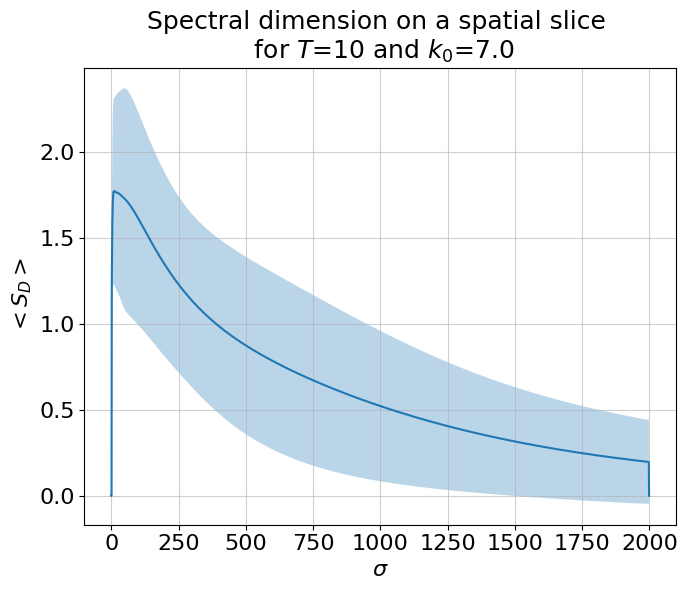

In [180]:
# Get data specdim
path_specdim_spatial = f'thermal_{target_volume}/sd/T{T}/specdim'
filepaths_specdim_spatial = glob.glob(f'{path_specdim_spatial}/*sptl=0_strt=2_T{T}_N{target_volume}_k0={k0}*')

specdim_spatial_data = []
for path in filepaths_specdim_spatial:
    data = np.loadtxt(path)
    specdim_spatial_data.append(data)

df_specdim = pd.DataFrame(specdim_spatial_data).T
df_specdim.index.name = 'sigma'
df_specdim.columns.name = 'sample'
df_specdim['mean'] = df_specdim.mean(axis=1)
df_specdim['std'] = df_specdim.std(axis=1)
df_specdim

# Plot
plt.figure(figsize=(7, 6))
plt.plot(df_specdim.index, df_specdim['mean'])
plt.fill_between(df_specdim.index, df_specdim['mean'] - df_specdim['std'], df_specdim['mean'] + df_specdim['std'], alpha=0.3)
plt.title(f'Spectral dimension on a spatial slice \n for $T$={T} and $k_0$={k0}', fontsize=18)
plt.ylabel('$<S_D>$', fontsize=16)
plt.xlabel('$\sigma$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/sd/T{T}/N{target_volume}/specdim_spatial_strt={start_flag}_T{T}_N{target_volume}_k0={k0}_tswps={thermal_sweeps}_swps={main_sweeps}.png'
if not os.path.exists(f'plots/sd/T{T}/N{target_volume}'):
    os.makedirs(f'plots/sd/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

<>:23: SyntaxWarning: invalid escape sequence '\s'
<>:23: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22129/2326731791.py:23: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$', fontsize=16)


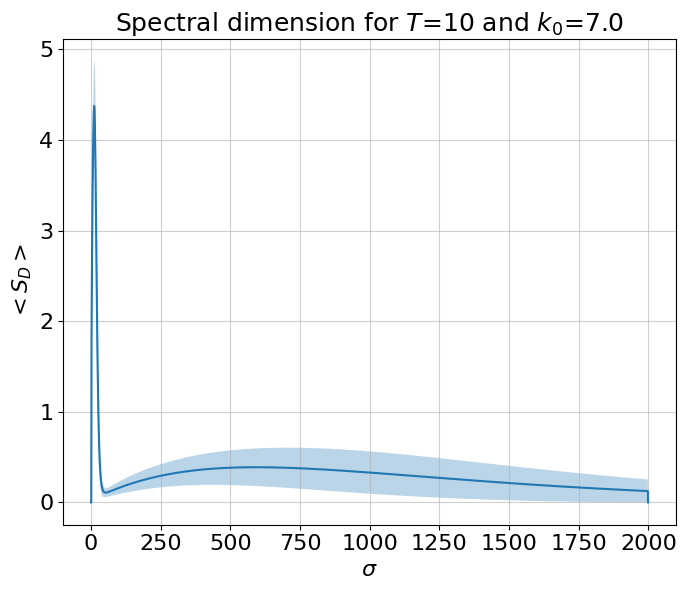

In [181]:
# Get data specdim 
path_specdim_full = f'thermal_{target_volume}/sd/T{T}/specdim'
filepaths_specdim_full = glob.glob(f'{path_specdim_full}/*sptl=1_strt=2_T{T}_N{target_volume}_k0={k0}*')

specdim_full_data = []
for path in filepaths_specdim_full:
    data = np.loadtxt(path)
    specdim_full_data.append(data)

df_specdim = pd.DataFrame(specdim_full_data).T
df_specdim.index.name = 'sigma'
df_specdim.columns.name = 'sample'
df_specdim['mean'] = df_specdim.mean(axis=1)
df_specdim['std'] = df_specdim.std(axis=1)
df_specdim

# Plot
plt.figure(figsize=(7, 6))
plt.plot(df_specdim.index, df_specdim['mean'])
plt.fill_between(df_specdim.index, df_specdim['mean'] - df_specdim['std'], df_specdim['mean'] + df_specdim['std'], alpha=0.3)
plt.title(f'Spectral dimension for $T$={T} and $k_0$={k0}', fontsize=18)
plt.ylabel('$<S_D>$', fontsize=16)
plt.xlabel('$\sigma$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.tight_layout()
savepath = f'plots/sd/T{T}/N{target_volume}/specdim_full_strt={start_flag}_T{T}_N{target_volume}_k0={k0}_tswps={thermal_sweeps}_swps={main_sweeps}.png'
if not os.path.exists(f'plots/sd/T{T}/N{target_volume}'):
    os.makedirs(f'plots/sd/T{T}/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

<>:57: SyntaxWarning: invalid escape sequence '\s'
<>:57: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22129/1059563530.py:57: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$', fontsize=16)


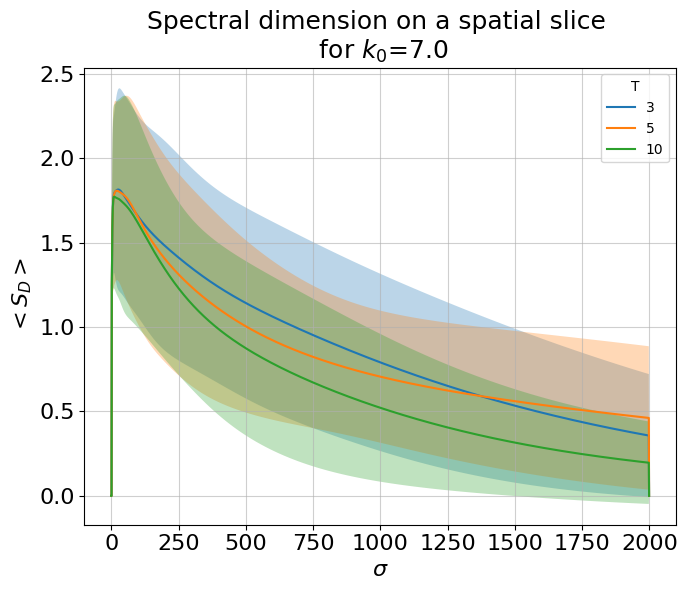

In [178]:
# Get data specdim
path_specdim_spatial3 = f'thermal_{target_volume}/sd/T3/specdim'
filepaths_specdim_spatial3 = glob.glob(f'{path_specdim_spatial3}/*sptl=0_strt=2_T3_N{target_volume}_k0={k0}*')

specdim_spatial_data3 = []
for path in filepaths_specdim_spatial3:
    data = np.loadtxt(path)
    specdim_spatial_data3.append(data)

df_specdim3 = pd.DataFrame(specdim_spatial_data3).T
df_specdim3.index.name = 'sigma'
df_specdim3.columns.name = 'sample'
df_specdim3['mean'] = df_specdim3.mean(axis=1)
df_specdim3['std'] = df_specdim3.std(axis=1)

# Get data specdim
path_specdim_spatial5 = f'thermal_{target_volume}/sd/T5/specdim'
filepaths_specdim_spatial5 = glob.glob(f'{path_specdim_spatial5}/*sptl=0_strt=2_T5_N{target_volume}_k0={k0}*')

specdim_spatial_data5 = []
for path in filepaths_specdim_spatial5:
    data = np.loadtxt(path)
    specdim_spatial_data5.append(data)

df_specdim5 = pd.DataFrame(specdim_spatial_data5).T
df_specdim5.index.name = 'sigma'
df_specdim5.columns.name = 'sample'
df_specdim5['mean'] = df_specdim5.mean(axis=1)
df_specdim5['std'] = df_specdim5.std(axis=1)

# Get data specdim
path_specdim_spatial10 = f'thermal_{target_volume}/sd/T10/specdim'
filepaths_specdim_spatial10 = glob.glob(f'{path_specdim_spatial10}/*sptl=0_strt=2_T10_N{target_volume}_k0={k0}*')

specdim_spatial_data10 = []
for path in filepaths_specdim_spatial10:
    data = np.loadtxt(path)
    specdim_spatial_data10.append(data)

df_specdim10 = pd.DataFrame(specdim_spatial_data10).T
df_specdim10.index.name = 'sigma'
df_specdim10.columns.name = 'sample'
df_specdim10['mean'] = df_specdim10.mean(axis=1)
df_specdim10['std'] = df_specdim10.std(axis=1)


# Plot
plt.figure(figsize=(7, 6))
plt.plot(df_specdim3.index, df_specdim3['mean'], label='3')
plt.fill_between(df_specdim3.index, df_specdim3['mean'] - df_specdim3['std'], df_specdim3['mean'] + df_specdim3['std'], alpha=0.3)
plt.plot(df_specdim5.index, df_specdim5['mean'], label='5')
plt.fill_between(df_specdim5.index, df_specdim5['mean'] - df_specdim5['std'], df_specdim5['mean'] + df_specdim5['std'], alpha=0.3)
plt.plot(df_specdim10.index, df_specdim10['mean'], label='10')
plt.fill_between(df_specdim10.index, df_specdim10['mean'] - df_specdim10['std'], df_specdim10['mean'] + df_specdim10['std'], alpha=0.3)
plt.title(f'Spectral dimension on a spatial slice \n for $k_0$={k0}', fontsize=18)
plt.ylabel('$<S_D>$', fontsize=16)
plt.xlabel('$\sigma$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True)
plt.tight_layout()
savepath = f'plots/sd/N{target_volume}/specdim_spatial_strt={start_flag}_N{target_volume}_k0={k0}_tswps={thermal_sweeps}_swps={main_sweeps}.png'
if not os.path.exists(f'plots/sd/N{target_volume}'):
    os.makedirs(f'plots/sd/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
<>:56: SyntaxWarning: invalid escape sequence '\s'
<>:78: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_22129/812249825.py:56: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$', fontsize=16)
/tmp/ipykernel_22129/812249825.py:78: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('$\sigma$', fontsize=16)


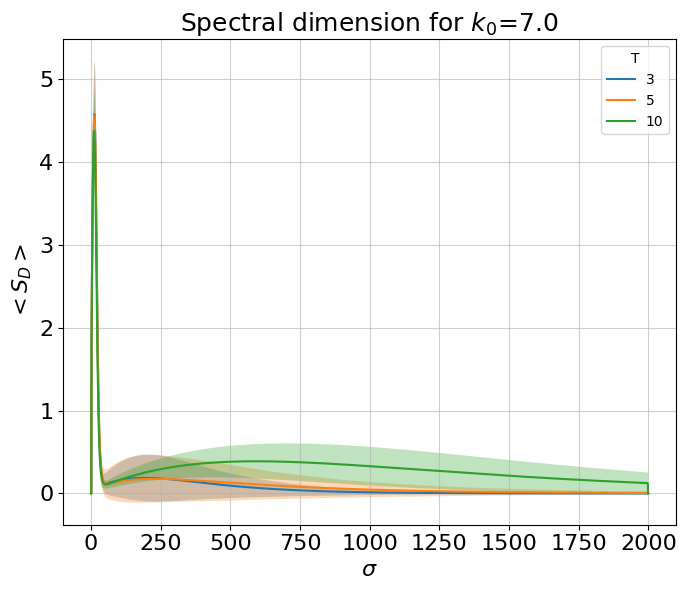

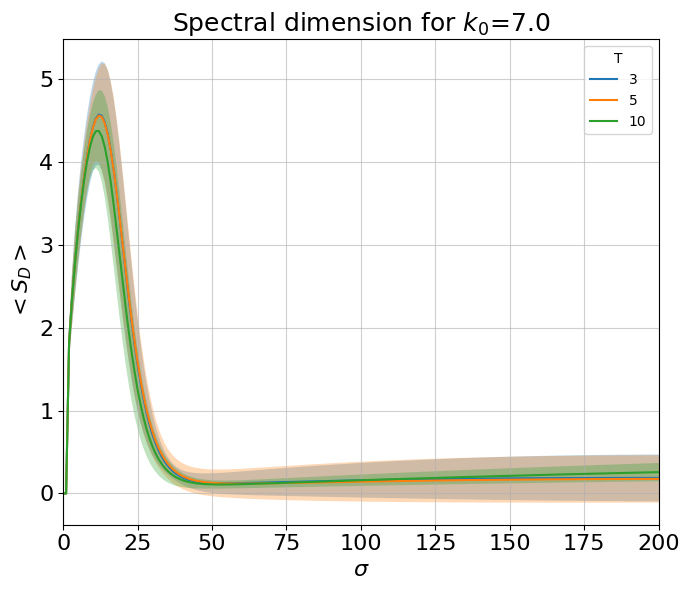

In [182]:
# Get data specdim
path_specdim_full3 = f'thermal_{target_volume}/sd/T3/specdim'
filepaths_specdim_full3 = glob.glob(f'{path_specdim_full3}/*sptl=1_strt=2_T3_N{target_volume}_k0={k0}*')

specdim_full_data3 = []
for path in filepaths_specdim_full3:
    data = np.loadtxt(path)
    specdim_full_data3.append(data)

df_specdim3 = pd.DataFrame(specdim_full_data3).T
df_specdim3.index.name = 'sigma'
df_specdim3.columns.name = 'sample'
df_specdim3['mean'] = df_specdim3.mean(axis=1)
df_specdim3['std'] = df_specdim3.std(axis=1)

# Get data specdim
path_specdim_full5 = f'thermal_{target_volume}/sd/T5/specdim'
filepaths_specdim_full5 = glob.glob(f'{path_specdim_full5}/*sptl=1_strt=2_T5_N{target_volume}_k0={k0}*')

specdim_full_data5 = []
for path in filepaths_specdim_full5:
    data = np.loadtxt(path)
    specdim_full_data5.append(data)

df_specdim5 = pd.DataFrame(specdim_full_data5).T
df_specdim5.index.name = 'sigma'
df_specdim5.columns.name = 'sample'
df_specdim5['mean'] = df_specdim5.mean(axis=1)
df_specdim5['std'] = df_specdim5.std(axis=1)

# Get data specdim
path_specdim_full10 = f'thermal_{target_volume}/sd/T10/specdim'
filepaths_specdim_full10 = glob.glob(f'{path_specdim_full10}/*sptl=1_strt=2_T10_N{target_volume}_k0={k0}*')

specdim_full_data10 = []
for path in filepaths_specdim_full10:
    data = np.loadtxt(path)
    specdim_full_data10.append(data)

df_specdim10 = pd.DataFrame(specdim_full_data10).T
df_specdim10.index.name = 'sigma'
df_specdim10.columns.name = 'sample'
df_specdim10['mean'] = df_specdim10.mean(axis=1)
df_specdim10['std'] = df_specdim10.std(axis=1)

# Plot
plt.figure(figsize=(7, 6))
plt.plot(df_specdim3.index, df_specdim3['mean'], label='3')
plt.fill_between(df_specdim3.index, df_specdim3['mean'] - df_specdim3['std'], df_specdim3['mean'] + df_specdim3['std'], alpha=0.3)
plt.plot(df_specdim5.index, df_specdim5['mean'], label='5')
plt.fill_between(df_specdim5.index, df_specdim5['mean'] - df_specdim5['std'], df_specdim5['mean'] + df_specdim5['std'], alpha=0.3)
plt.plot(df_specdim10.index, df_specdim10['mean'], label='10')
plt.fill_between(df_specdim10.index, df_specdim10['mean'] - df_specdim10['std'], df_specdim10['mean'] + df_specdim10['std'], alpha=0.3)
plt.title(f'Spectral dimension for $k_0$={k0}', fontsize=18)
plt.ylabel('$<S_D>$', fontsize=16)
plt.xlabel('$\sigma$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True)
plt.tight_layout()
savepath = f'plots/sd/N{target_volume}/specdim_full_strt={start_flag}_N{target_volume}_k0={k0}_tswps={thermal_sweeps}_swps={main_sweeps}.png'
if not os.path.exists(f'plots/sd/N{target_volume}'):
    os.makedirs(f'plots/sd/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')

# Plot
plt.figure(figsize=(7, 6))
plt.plot(df_specdim3.index, df_specdim3['mean'], label='3')
plt.fill_between(df_specdim3.index, df_specdim3['mean'] - df_specdim3['std'], df_specdim3['mean'] + df_specdim3['std'], alpha=0.3)
plt.plot(df_specdim5.index, df_specdim5['mean'], label='5')
plt.fill_between(df_specdim5.index, df_specdim5['mean'] - df_specdim5['std'], df_specdim5['mean'] + df_specdim5['std'], alpha=0.3)
plt.plot(df_specdim10.index, df_specdim10['mean'], label='10')
plt.fill_between(df_specdim10.index, df_specdim10['mean'] - df_specdim10['std'], df_specdim10['mean'] + df_specdim10['std'], alpha=0.3)
plt.title(f'Spectral dimension for $k_0$={k0}', fontsize=18)
plt.xlim(0, 200)
plt.ylabel('$<S_D>$', fontsize=16)
plt.xlabel('$\sigma$', fontsize=16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.grid(True, which="both", ls="-", alpha=0.6)
plt.legend(title='T', fancybox=True)
plt.tight_layout()
savepath = f'plots/sd/N{target_volume}/zoomin_specdim_full_strt={start_flag}_N{target_volume}_k0={k0}_tswps={thermal_sweeps}_swps={main_sweeps}.png'
if not os.path.exists(f'plots/sd/N{target_volume}'):
    os.makedirs(f'plots/sd/N{target_volume}')
plt.savefig(savepath, dpi=400, bbox_inches='tight')
